In [98]:
#import package 
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt


In [9]:
#import data
df=pd.read_csv('./data/winequality-red.csv',encoding='utf-8')

In [18]:
#import data
df=pd.read_csv('./data/scrapprice.csv',encoding='utf-8')
df=df.select_dtypes(include=['int64', 'float64'])

In [100]:
df

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [36]:
# 计算相关关
corrmat=df.corr()
corrmat_price=corrmat['price'].iloc[1:-1].sort_values()
corrmat_price

highwaympg         -0.697599
citympg            -0.685751
peakrpm            -0.085267
symboling          -0.079978
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
boreratio           0.553173
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
Name: price, dtype: float64

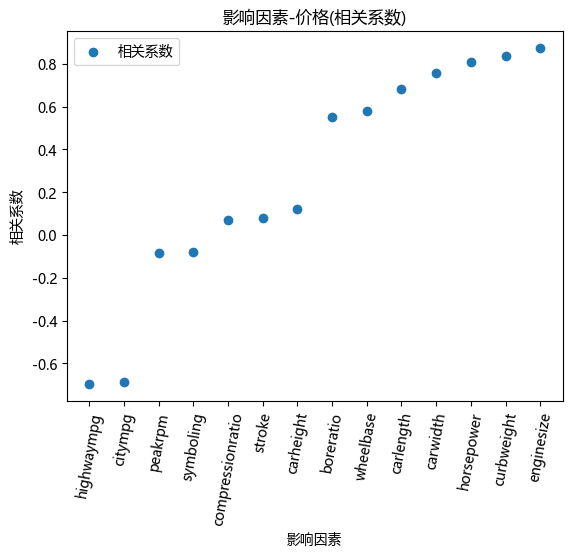

In [50]:
#相关系数排序并绘图
plt.rcParams['axes.unicode_minus']=False #解决图像中负号显示为方框的问题
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #
plt.xticks(rotation=80)
plt.title("影响因素-价格(相关系数)")
plt.ylabel('相关系数')
plt.xlabel('影响因素')
plt.scatter(corrmat_price.index ,corrmat_price,label='相关系数')
plt.legend()

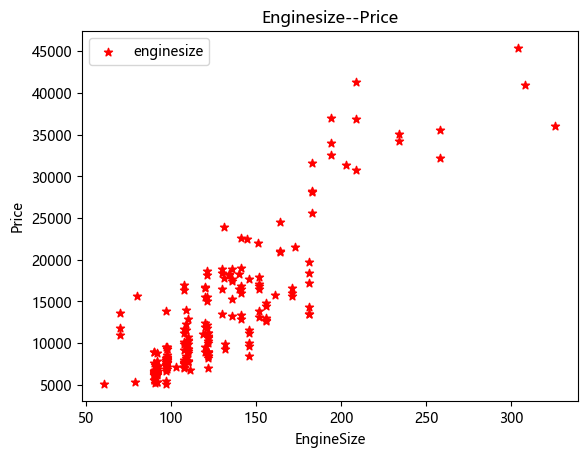

In [51]:
#最强正相关作图
plt.title('Enginesize--Price')
plt.xlabel('EngineSize')
plt.ylabel('Price')
plt.scatter(df['enginesize'],df['price'],marker='*',color='red',label='enginesize')
plt.legend()

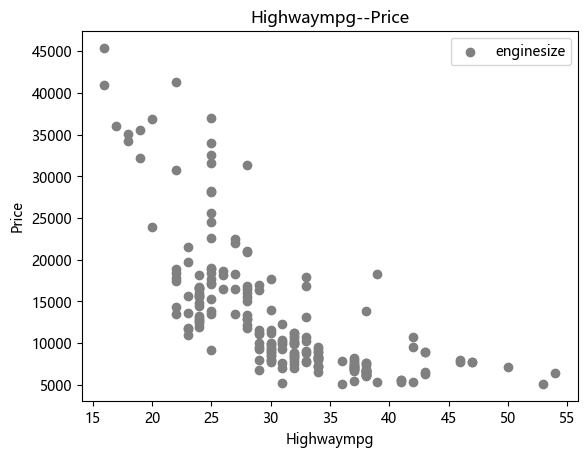

In [54]:
#最强负相关作图
plt.title('Highwaympg--Price')
plt.xlabel('Highwaympg')
plt.ylabel('Price')
plt.scatter(df['highwaympg'],df['price'],marker='o',color='gray',label='Highwaympg')
plt.legend()

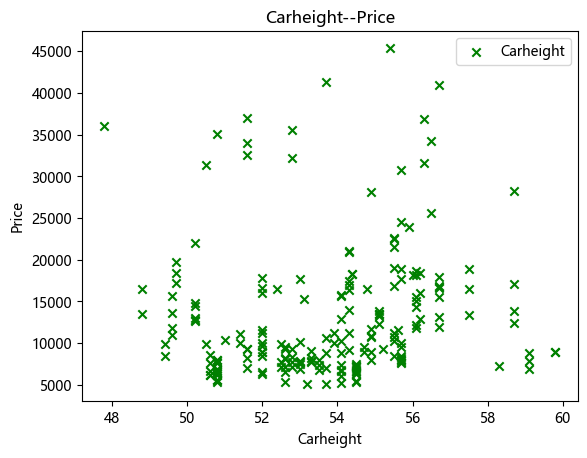

In [55]:
#最强负相关作图
plt.title('Carheight--Price')
plt.xlabel('Carheight')
plt.ylabel('Price')
plt.scatter(df['carheight'],df['price'],marker='x',color='green',label='Carheight')
plt.legend()

In [69]:
#取出训练集
X=df.iloc[:,1:-1]

y=df.iloc[:,-1]
X

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [75]:
#数据归一化Z-NORMAL
##自定义函数
def z_normal(data):
    
    '''
     data must be pandas dataframe
     return mean, std,z_normal
    '''
    # print(data.mean())
    # print(data.std())
    return data.mean(), data.std(),(data - data.mean()) / data.std()

##特征归一化
X_mean,X_std,X_normal=z_normal(X)

In [78]:
X_normal

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.739213,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0.074267,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725
1,1.739213,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0.074267,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725
2,0.133183,-0.706865,-0.230948,-0.190101,-0.542200,0.513625,0.602571,-2.399008,0.684271,-0.287645,1.261448,-0.262318,-0.950684,-0.689938
3,0.936198,0.173274,0.206750,0.136209,0.235366,-0.419770,-0.430023,-0.516003,0.461055,-0.035885,-0.053537,0.785932,-0.186409,-0.109087
4,0.936198,0.106848,0.206750,0.229440,0.235366,0.515545,0.218350,-0.516003,0.461055,-0.539405,0.275209,0.785932,-1.103540,-1.270789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.472847,1.717669,1.195622,1.394830,0.726460,0.761377,0.338419,1.662375,-0.336147,-0.161765,0.249921,0.576282,-0.339264,-0.399512
201,-1.472847,1.717669,1.195622,1.348215,0.726460,0.947672,0.338419,1.662375,-0.336147,-0.363173,1.413178,0.366632,-0.950684,-0.835151
202,-1.472847,1.717669,1.195622,1.394830,0.726460,0.876611,1.106861,0.923942,-1.229012,-0.337997,0.755685,0.785932,-1.103540,-1.125577
203,-1.472847,1.717669,1.195622,1.394830,0.726460,1.270327,0.434474,-1.180593,0.461055,3.236992,0.047616,-0.681618,0.119302,-0.544725


In [89]:
#训练模型，评估模型
##线性回归模型
model = linear_model.LinearRegression()
model.fit(X_normal, y)
y_pred=model.predict(X_normal)
#print(model.coef_)
#print(model.intercept_)
mean_squared_error(y,y_pred)

9407873.764863722

In [93]:
##岭回归模型
#训练模型，评估模型
##线性回归模型
model = Ridge(alpha=1.0)
model.fit(X_normal, y)
y_pred=model.predict(X_normal)
#print(model.coef_)
#print(model.intercept_)
mean_squared_error(y,y_pred)

9416680.58736838

In [95]:
##弹性回归模型
#训练模型，评估模型
##线性回归模型
model = ElasticNet(alpha=1.0,l1_ratio=0.5,random_state=42)
model.fit(X_normal, y)
y_pred=model.predict(X_normal)
#print(model.coef_)
#print(model.intercept_)
mean_squared_error(y,y_pred)

12273001.371552352

In [99]:
##岭回归模型
#训练模型，评估模型
##线性回归模型
model = Lasso(alpha=1.0)
model.fit(X_normal, y)
y_pred=model.predict(X_normal)
#print(model.coef_)
#print(model.intercept_)
mean_squared_error(y,y_pred)

9408063.124711592